# Exploratory Data Analysis (EDA) on a Home Loan dataset

This project conduct an in-depth Exploratory Data Analysis (EDA) on a Home Loan dataset. The objective is to understand the underlying structure, trends, and relationships in the data through data cleaning, visualization, and statistical analysis. This initial investigation is essential for uncovering patterns that may influence loan approvals and risk assessment. 
Financial institutions rely on historical loan data to assess creditworthiness and refine their lending practices. The Home Loan dataset contains key information on applicants, such as income, employment status, credit history, and property details, along with the corresponding loan outcomes.

## Phase 1: Data Collection and Preparation

### Import relevant Libraries


In [38]:
# importing library
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stat 
import numpy as np
import statistics 
# set display options
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)



### Task 1.1: Load the Home Loan datasets into a Pandas DataFrame

In [39]:
# loading data
loan_train_path= "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"  #path to the loan dataset

# path to the test data
loan_test_path = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_test.csv"

# load the train data
loan_train = pd.read_csv(loan_train_path)
train = loan_train
# load the test data
loan_test = pd.read_csv(loan_test_path)
test = loan_test

###  Task 1.2: Inspect the dataset for missing values, duplicates, and data type inconsistencies.

## Train data

In [40]:
# inspect the data
print(f" Head {train.head()}")
print("******************************************************************")
print (f" Tail {train.tail()}")



 Head     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             

In [41]:
# To have a snapshot of the data
print(f" Snapshot {train.info()}")
print("******************************************************************")
print(f"Shape {train.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
 Snapshot None
******************************************************************
Shape (614, 13)


#### Test Data

In [42]:
print(f" Heal {test.head()}")
print("******************************************************************")
print (f" Tail {test.tail()}")


 Heal     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             Na

In [43]:
print(f" Snapshot {test.info()}")
print("******************************************************************")
print(f"Shape {test.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
 Snapshot None
******************************************************************
Shape (367, 12)


#### The Dependents Column should have interger datatype 

### Descriptive Statistics for continuous variables

In [44]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [46]:
# Handling Missing Values
print(f" Missing Values for Train Data: {train.isnull().sum()}")
print("******************************************************************")
print(f" Missing Values for Test Data: {test.isnull().sum()}")


 Missing Values for Train Data: Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
******************************************************************
 Missing Values for Test Data: Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


<Axes: >

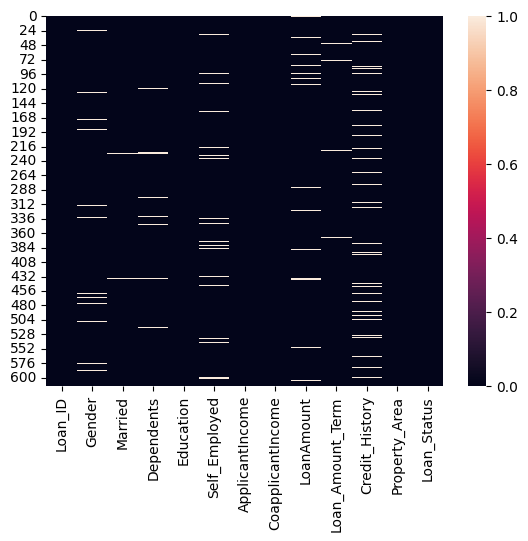

In [47]:
## Visualizing with heatmaps 
# Load Train data
sns.heatmap(train.isnull())

<Axes: >

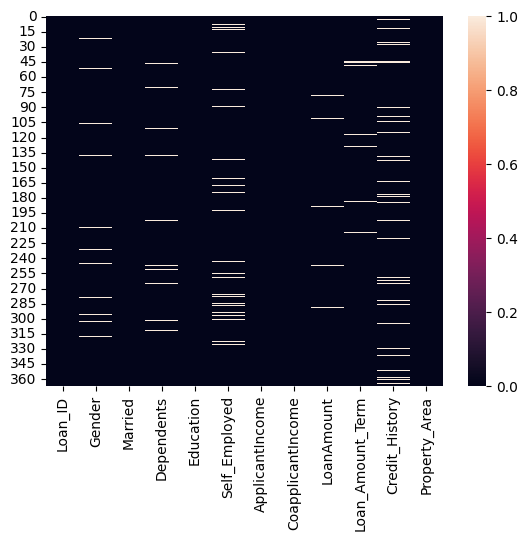

In [48]:
# Load Test data
sns.heatmap(test.isnull())

# Data Cleaning and Preparation : Missing values, Duplicates and Inconsistencies

## Handling Missing Values (Most columns have few missing values)
* Drop rows with more than 3 missing values
* For categorical values such as Gender, Marrried, Dependents and Self employed, i will fill with the Mode 
*  For numerical data such as LoanAmount, i will fill with the Median, while for Loan_Amount_Term
i will fill with mode since most common term is usually 360 months

In [49]:
# Dropping rows with more than 3 missing values
train = train[train.isnull().sum(axis=1) <= 3]
test = test[test.isnull().sum(axis=1) <= 3]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [51]:
# Checking for the mode in Gender, Marrried, Self employed, Dependents and LOan_Amount_Term 
print(f"Mode for Gender:  {statistics.mode(train['Gender'])}")      

print(f" Mode for Married: {statistics.mode(train['Married'])}")

print(f" Mode for Dependents: {statistics.mode(train['Dependents'])}")

print(f" Mode for Self Employed: {statistics.mode(train['Self_Employed'])}")

print(f" Mode for credit history: {statistics.mode(train['Credit_History'])}")

# Test 
print(f"Mode for Gender:  {statistics.mode(test['Gender'])}")      

print(f" Mode for Married: {statistics.mode(test['Married'])}")

print(f" Mode for Self Employed: {statistics.mode(test['Self_Employed'])}")




Mode for Gender:  Male
 Mode for Married: Yes
 Mode for Dependents: 0
 Mode for Self Employed: No
 Mode for credit history: 1.0
Mode for Gender:  Male
 Mode for Married: Yes
 Mode for Self Employed: No


In [52]:
# filling missing valus in Gender, Marrried, Self employed, Dependents and LOan_Amount_Term with the Mode
for col in ['Gender', 'Married', 'Dependents' , 'Self_Employed', 'Loan_Amount_Term' , 'Credit_History']:
    train[col] = train[col].fillna(train[col].mode()[0])
    test[col] = test[col].fillna(test[col].mode()[0])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [53]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [55]:
#  Replacing missing values in LoanAmount with the  Median
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

train.isnull().sum()
 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###  All missing values have been handled

### Handling duplicates 

In [56]:
print(f" Duplicate Values for Train Data: {train.duplicated().sum()}")
print("******************************************************************")
print(f" Duplicates Values for Test Data: {test.duplicated().sum()}")


 Duplicate Values for Train Data: 0
******************************************************************
 Duplicates Values for Test Data: 0


### There is no duplicate values

### Handling Incosistencies

#### Converting Dependents from string to integer

In [58]:
# Viewing the unique values in Dependents

print(f" Unique values in Loan Train data: {train['Dependents'].unique()}")
print(f" Unique values in Loan Test data: {test['Dependents'].unique()}")


 Unique values in Loan Train data: ['0' '1' '2' '3+']
 Unique values in Loan Test data: ['0' '1' '2' '3+']


In [59]:
#Changing the value '+3' to proper integer: replacing with number '

train['Dependents'] = train['Dependents'].replace("3+" , "3")
test['Dependents'] = test['Dependents'].replace("3+" , 3)



In [60]:
print(f" Unique values in Loan Train data: {train['Dependents'].unique()}")
print(f" Unique values in Loan Test data: {test['Dependents'].unique()}")


 Unique values in Loan Train data: ['0' '1' '2' '3']
 Unique values in Loan Test data: ['0' '1' '2' 3]


In [61]:
# Converting Dependets to Integer

train['Dependents'] = train['Dependents'].astype(int)
test['Dependents'] = test['Dependents'].astype(int)


test['Dependents'].dtype

test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(3), object(6)
memory usage: 34.5+ KB


## Outlier Detection

In [65]:
# Statistical summary

outlier_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents', 'Loan_Amount_Term']
print("Statistical Summary:")
print(train[outlier_columns].describe())

Statistical Summary:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Dependents  \
count       614.000000         614.000000  614.000000  614.000000   
mean       5403.459283        1621.245798  145.752443    0.744300   
std        6109.041673        2926.248369   84.107233    1.009623   
min         150.000000           0.000000    9.000000    0.000000   
25%        2877.500000           0.000000  100.250000    0.000000   
50%        3812.500000        1188.500000  128.000000    0.000000   
75%        5795.000000        2297.250000  164.750000    1.000000   
max       81000.000000       41667.000000  700.000000    3.000000   

       Loan_Amount_Term  
count        614.000000  
mean         342.410423  
std           64.428629  
min           12.000000  
25%          360.000000  
50%          360.000000  
75%          360.000000  
max          480.000000  


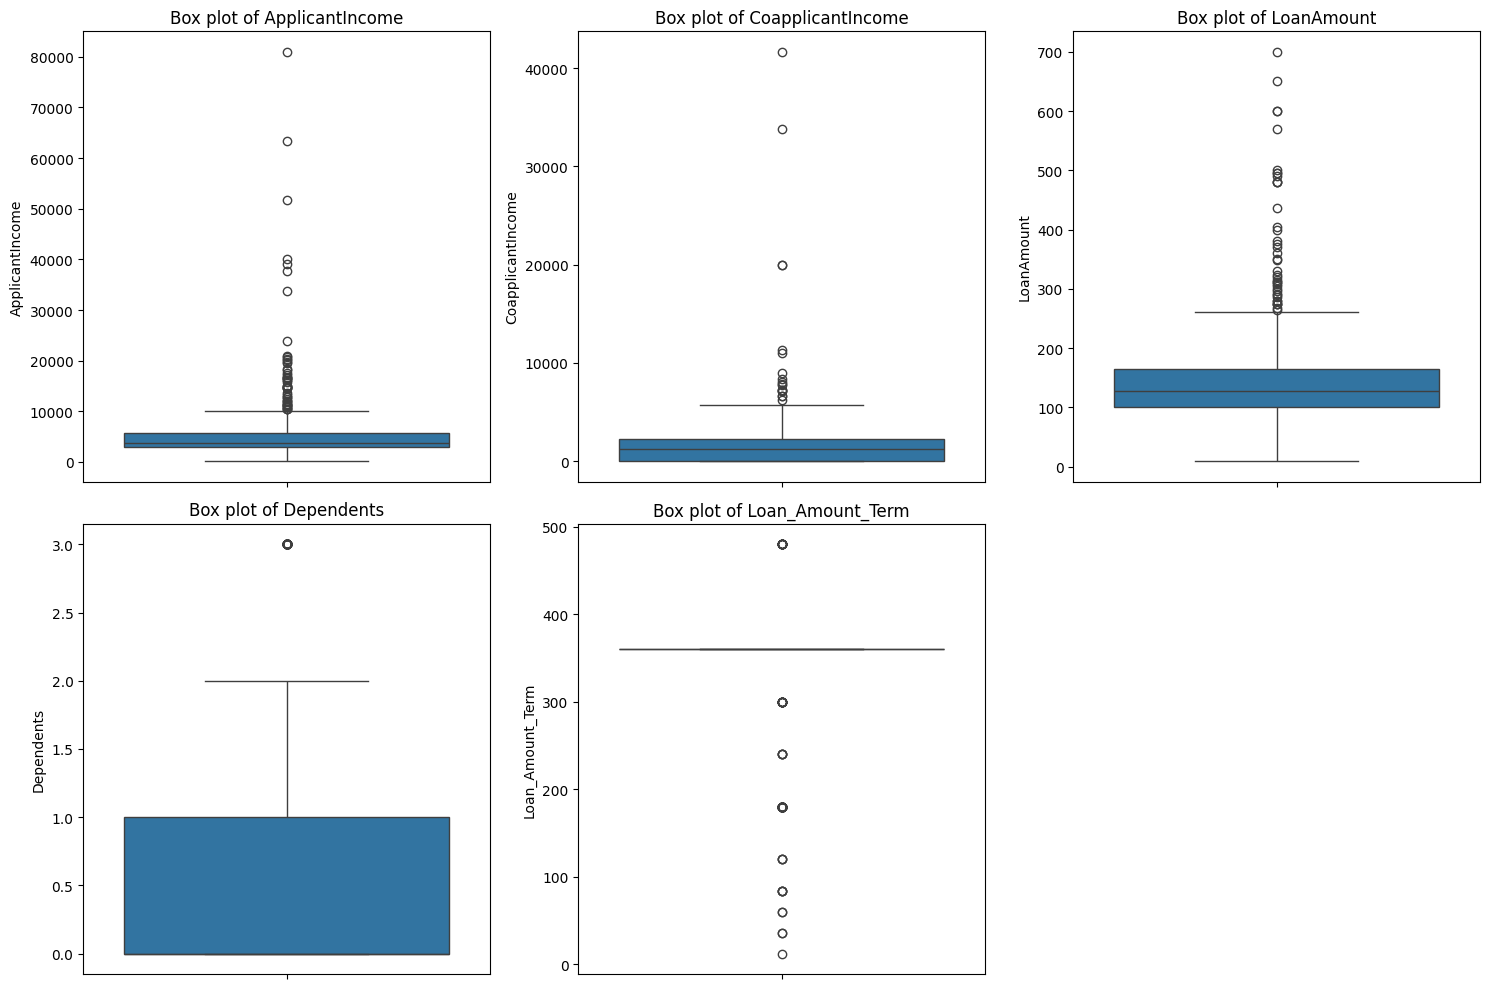

In [68]:


outlier_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents', 'Loan_Amount_Term']

# Box plots to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()
 

In [ ]:
# Identify outliers using IQR method
for col in outlier_columns:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)]
    print(f"\n{col}: {len(outliers)} outliers ({len(outliers)/len(train)*100:.2f}%)")


ApplicantIncome: 50 outliers (8.14%)

CoapplicantIncome: 18 outliers (2.93%)

LoanAmount: 41 outliers (6.68%)

Dependents: 51 outliers (8.31%)

Loan_Amount_Term: 88 outliers (14.33%)


## Handling Outliers using the Capping method

In [ ]:
def cap_outliers(train, outlier_columns):
    train_clean = train.copy()
    for col in outlier_columns:
        Q1 = train_clean[col].quantile(0.25)
        Q3 = train_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap outliers to the bounds
        train_clean[col] = np.where(train_clean[col] < lower_bound, lower_bound, train_clean[col])
        train_clean[col] = np.where(train_clean[col] > upper_bound, upper_bound, train_clean[col])
    
    return train_clean

# Apply capping
train_clean = cap_outliers(train, outlier_columns)


# Phase 2: Exploratory Data Analysis (EDA)

## Task 2.1: Conduct descriptive statistics to summarize the key characteristics of the data

----------------------------------------------------------------
 ### **1. Descriptive Stats**
 ---------------------------------------------------------------

In [96]:
df = train_clean.copy()

In [97]:
# lets pick out the numerical columns and get the descriptions
num_features = train_clean.select_dtypes(include=['float64', 'int64']).columns
train_clean[num_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,614.0,0.702769,0.922357,0.0,0.00,0.0,1.00,2.500
ApplicantIncome,614.0,4617.111564,2479.851729,150.0,2877.50,3812.5,5795.00,10171.250
CoapplicantIncome,614.0,1419.702231,1624.605892,0.0,0.00,1188.5,2297.25,5743.125
LoanAmount,614.0,137.365635,55.779749,9.0,100.25,128.0,164.75,261.500
Loan_Amount_Term,614.0,360.000000,0.000000,360.0,360.00,360.0,360.00,360.000
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.000


In [98]:

# Descriptive Stats
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.0,614.000000
mean,0.702769,4617.111564,1419.702231,137.365635,360.0,0.855049
std,0.922357,2479.851729,1624.605892,55.779749,0.0,0.352339
min,0.000000,150.000000,0.000000,9.000000,360.0,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.0,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.0,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.0,1.000000
max,2.500000,10171.250000,5743.125000,261.500000,360.0,1.000000


✅ Sample size is 614 (sufficient)

✅ No Outliers  (max values are reasonable)

✅ No missing values in these columns

✅ Good data distribution (moderate skewness)


## Task 2.2: Visualize distributions of numerical features (e.g., applicant income, loan amount) using histograms and box plots.

In [105]:

def univariate_numerical_eda(df, column):

    print("_______________________________________________________")
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


_______________________________________________________
 Feature: Dependents
       Dependents
count  614.000000
mean     0.702769
std      0.922357
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      2.500000

Skewness: 0.822
Kurtosis: -0.951


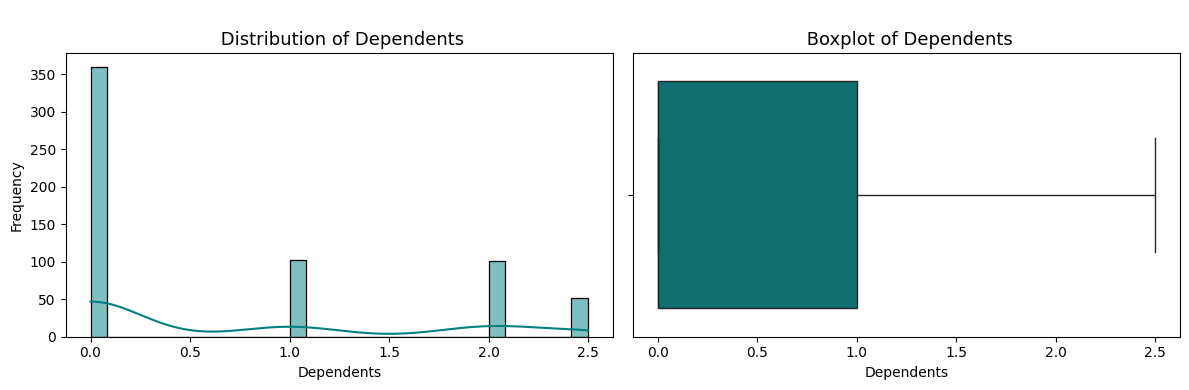

Dependents is moderately skewed.
_______________________________________________________
 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       4617.111564
std        2479.851729
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       10171.250000

Skewness: 1.040
Kurtosis: 0.126


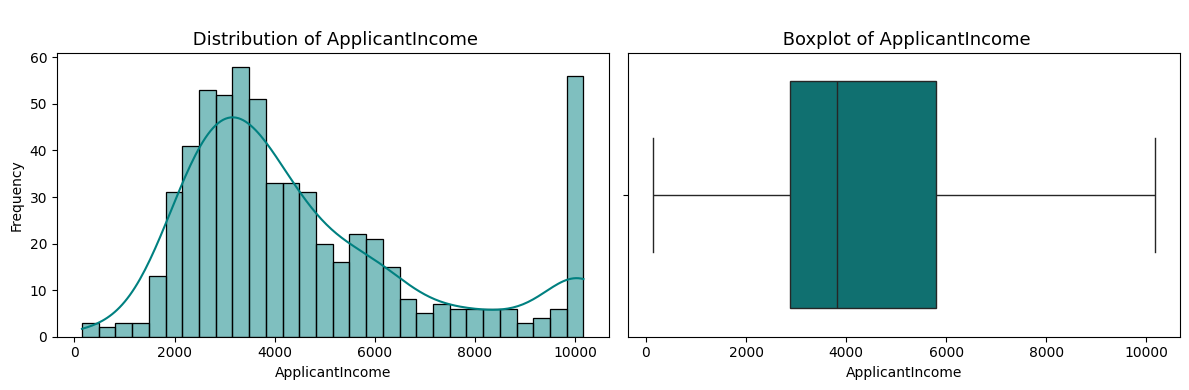


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
_______________________________________________________
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1419.702231
std          1624.605892
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max          5743.125000

Skewness: 1.013
Kurtosis: 0.245


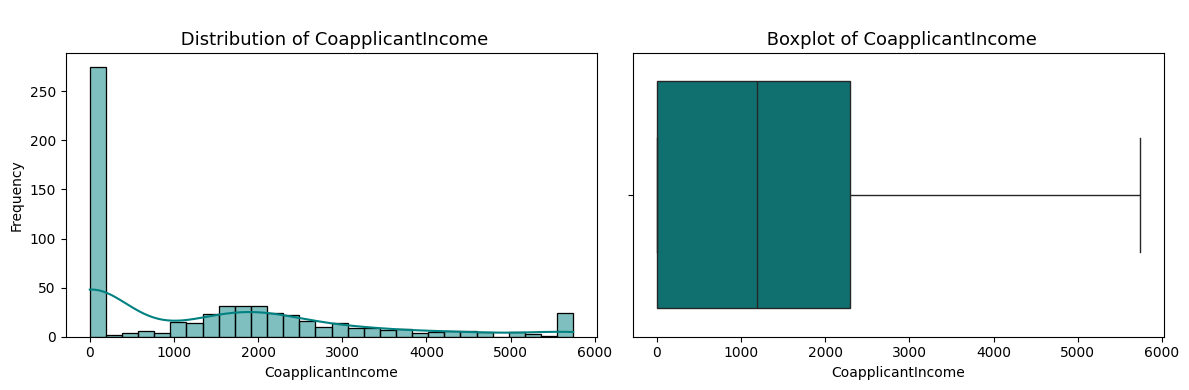


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
_______________________________________________________
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   137.365635
std     55.779749
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    261.500000

Skewness: 0.684
Kurtosis: 0.112


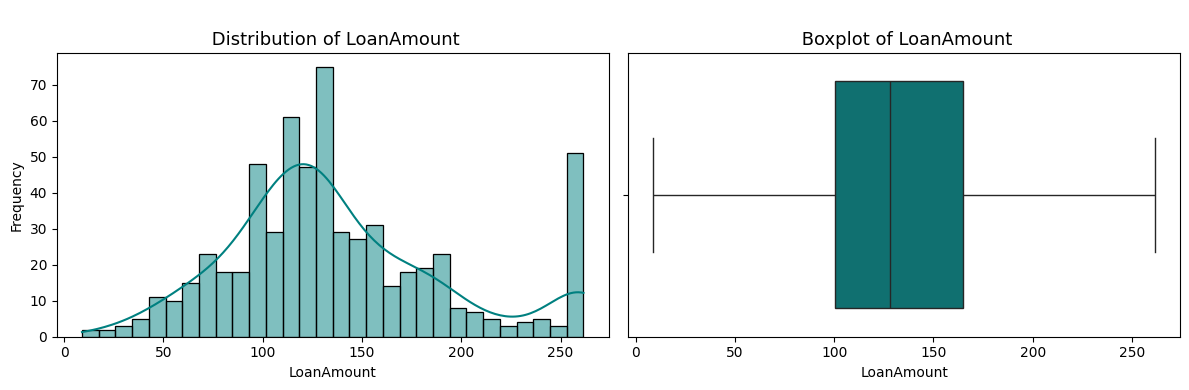

LoanAmount is moderately skewed.
_______________________________________________________
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count             614.0
mean              360.0
std                 0.0
min               360.0
25%               360.0
50%               360.0
75%               360.0
max               360.0

Skewness: 0.000
Kurtosis: 0.000


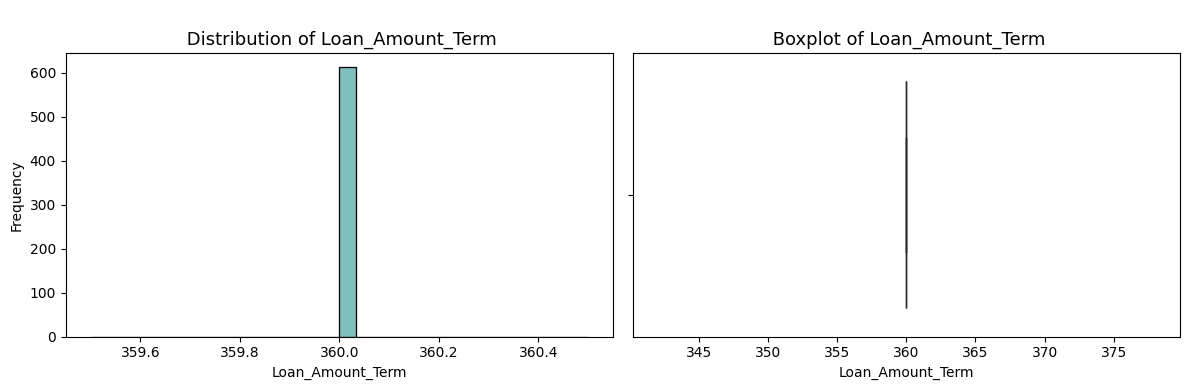

Loan_Amount_Term is fairly symmetric.
_______________________________________________________
 Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.022
Kurtosis: 2.095


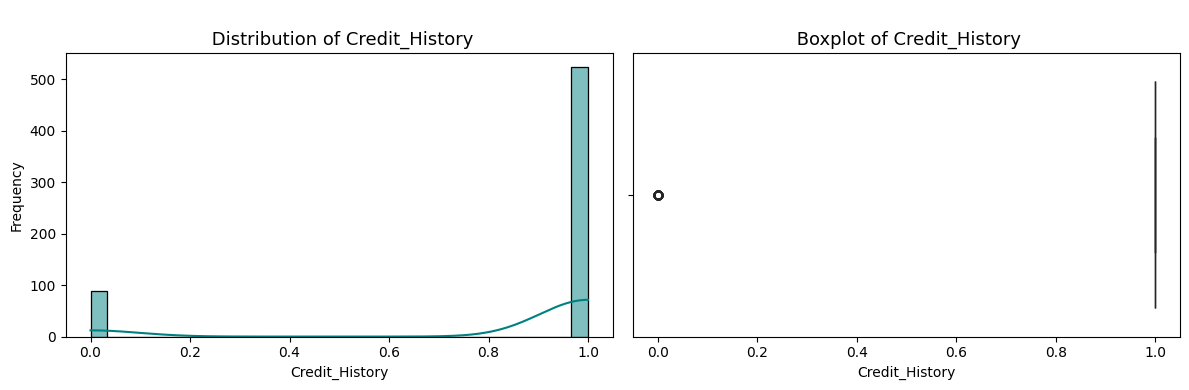


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [106]:
# 1. Univariate analysis of numerical variables
for col in num_features:
    univariate_numerical_eda(df, col)

## Task 2.3: Analyze categorical features (e.g., education, employment status, property area) using bar charts and pie charts.

In [110]:
cat_features = df.select_dtypes(include=['object']).columns
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, and a countplot.
    """
    print(f"Feature: {column}")
    print("="*40)

    # Frequency + proportion
    freq = df[column].value_counts()
    prop = df[column].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # Visualization
    plt.figure(figsize=(8,5))
    ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')
    plt.title(f'Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Count')

    # Annotate each bar with percentage
    total = len(df[column])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')

    plt.tight_layout()
    plt.show()

Feature: Loan_ID
          Count  Percentage
Loan_ID                    
LP001002      1        0.16
LP001003      1        0.16
LP001005      1        0.16
LP001006      1        0.16
LP001008      1        0.16
...         ...         ...
LP002978      1        0.16
LP002979      1        0.16
LP002983      1        0.16
LP002984      1        0.16
LP002990      1        0.16

[614 rows x 2 columns]



C:\Users\sobokha\AppData\Local\Temp\ipykernel_3048\2427052941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


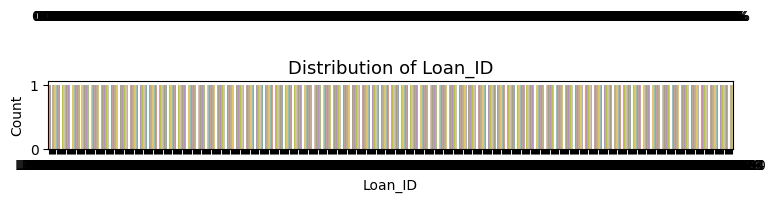

Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\sobokha\AppData\Local\Temp\ipykernel_3048\2427052941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


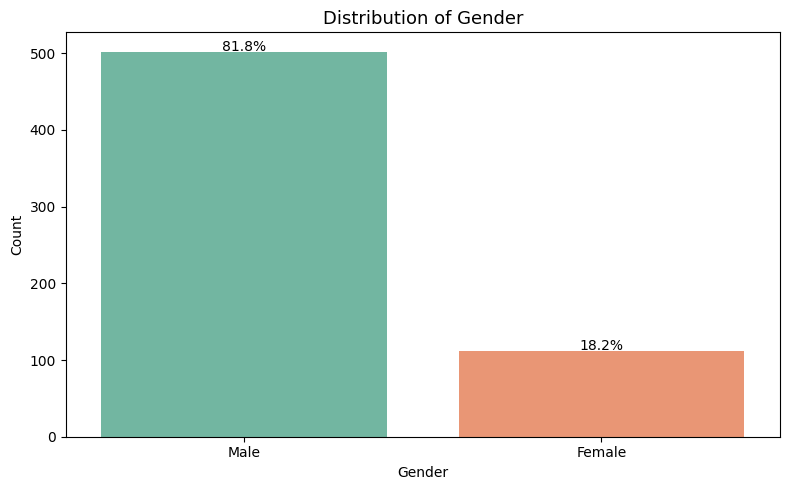

Feature: Married
         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\sobokha\AppData\Local\Temp\ipykernel_3048\2427052941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


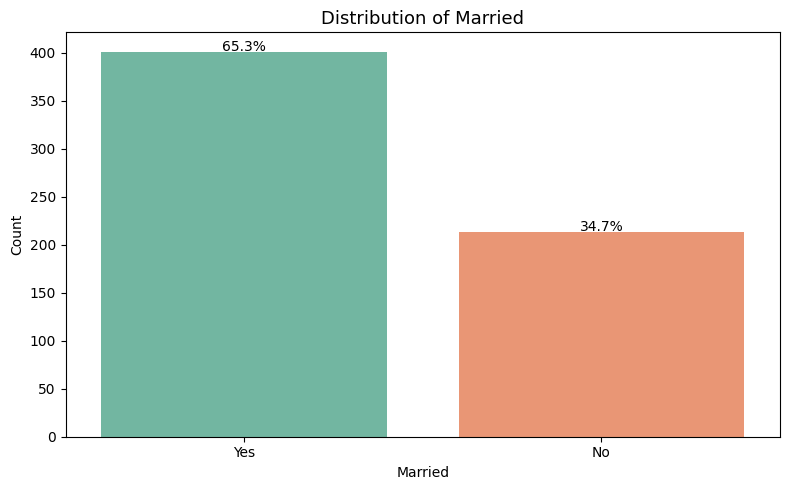

Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\sobokha\AppData\Local\Temp\ipykernel_3048\2427052941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


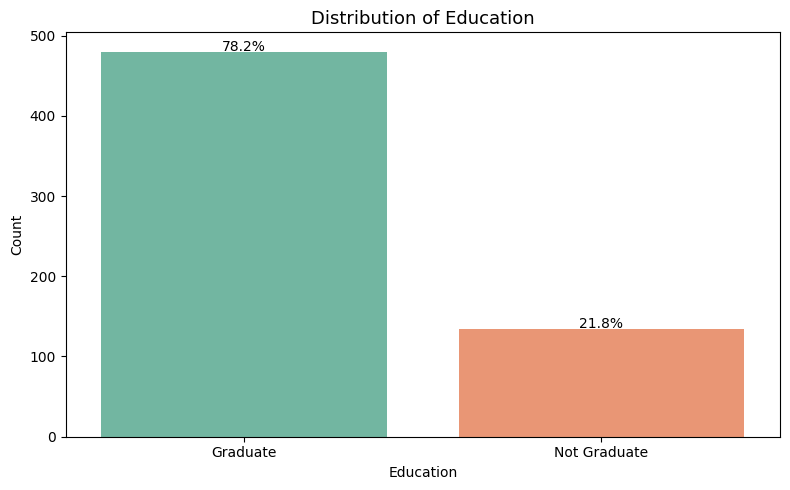

Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\sobokha\AppData\Local\Temp\ipykernel_3048\2427052941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


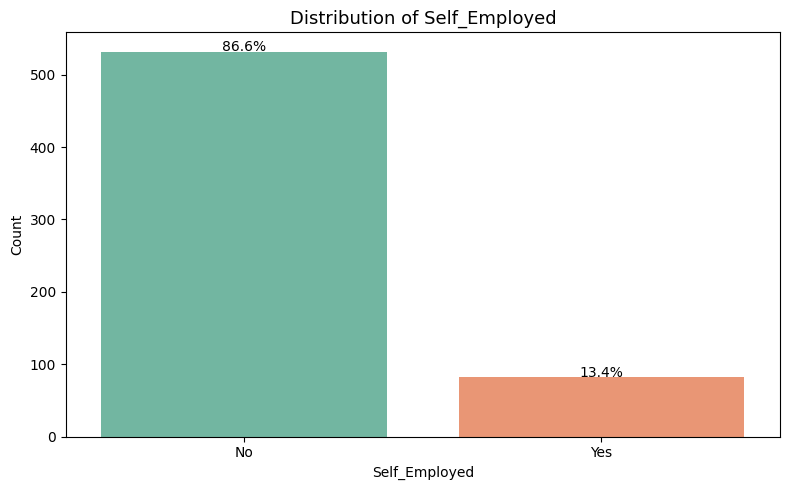

Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\sobokha\AppData\Local\Temp\ipykernel_3048\2427052941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


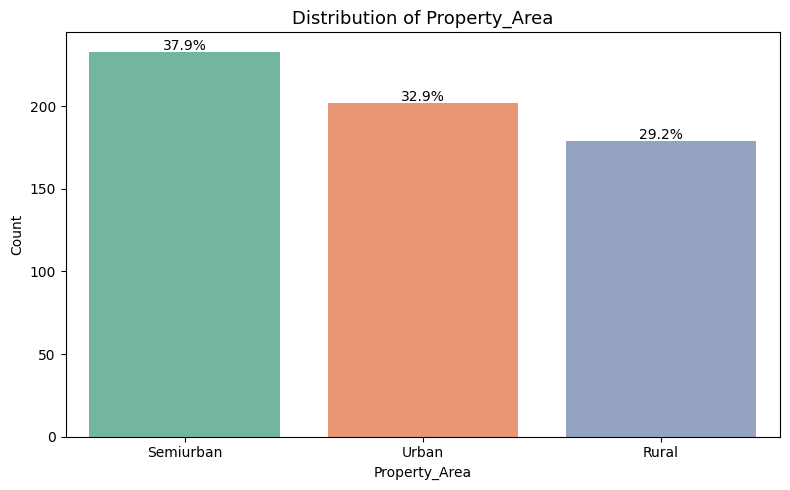

Feature: Loan_Status
             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\sobokha\AppData\Local\Temp\ipykernel_3048\2427052941.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=column, data=df, palette='Set2', order=freq.index,color='teal')


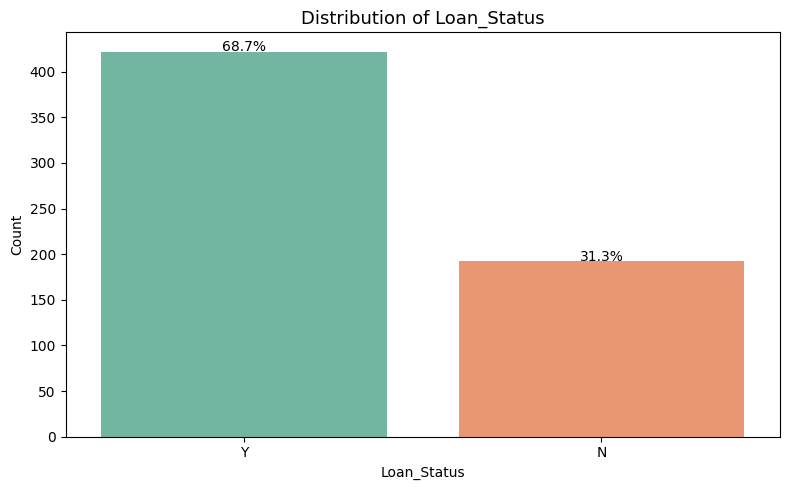

In [111]:
# 1. Univariate analysis of categorical variables
for col in cat_features:
    univariate_categorical_eda(df, col)

**Key Univariate Findings**

*

## Task 2.4: Examine relationships between features and the target

In [ ]:

# Descriptive Stats
print(df['ApplicantIncome'].describe())
print(df['LoanAmount'].describe())
print(df['Education'].value_counts())
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

# Univariate Analysis
sns.histplot(df['LoanAmount'], kde=True)
plt.show()

sns.countplot(x='Education', data=df)
plt.show()

# Bivariate Analysis
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.show()

print(pd.crosstab(df['Credit_History'], df['Loan_Status'], normalize='index'))

# Correlation Analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Visualization
df['ApplicantIncome'].hist(bins=30)
plt.title('Applicant Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=df)
plt.show()

# Insights
print("Credit history has a strong correlation with loan approval.")
print("Higher income does not always guarantee loan approval.")
print("Property area and education level show interesting trends.")

# Conclusion
print("Next step: build a classification model to predict loan approval.")


NameError: name 'df' is not defined